# Mushroom Dataset SVM Analysis

## Introduction

This notebook performs an analysis on the Mushroom dataset using Support Vector Machine (SVM). The steps include Exploratory Data Analysis (EDA), Data Preprocessing, Data Visualization, SVM Implementation, Visualization of SVM Results, Parameter Tuning and Optimization, and Comparison and Analysis.

## Step 1: Exploratory Data Analysis (EDA)

### Load the Mushroom Dataset and Perform Fundamental Data Exploration

In [36]:
import pandas as pd

# Load the dataset
mushroom_df = pd.read_csv('mushroom.csv')

mushroom_df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [37]:
# Removing `unnamed 0` column

mushroom_df.drop(columns='Unnamed: 0', inplace= True)

# Display basic information about the dataset
mushroom_df.info()
print('\n')
mushroom_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cap_shape                 2000 non-null   object 
 1   cap_surface               2000 non-null   object 
 2   cap_color                 2000 non-null   object 
 3   bruises                   2000 non-null   object 
 4   odor                      2000 non-null   object 
 5   gill_attachment           2000 non-null   object 
 6   gill_spacing              2000 non-null   object 
 7   gill_size                 2000 non-null   object 
 8   gill_color                2000 non-null   object 
 9   stalk_shape               2000 non-null   object 
 10  stalk_root                2000 non-null   object 
 11  stalk_surface_above_ring  2000 non-null   object 
 12  stalk_surface_below_ring  2000 non-null   object 
 13  stalk_color_above_ring    2000 non-null   object 
 14  stalk_co

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


### About Dataset

- The dataset contains 2000 entries and 25 columns. 
- The columns include various features of mushrooms such as cap shape, cap surface, cap color, bruises, odor, gill attachment, gill spacing, gill size, gill color, stalk shape, stalk root, stalk surface above ring, stalk surface below ring, stalk color above ring, stalk color below ring, veil type, veil color, ring number, ring type, spore print color, population, habitat, class, stalk height, and cap diameter.

### Visualize Feature Distributions

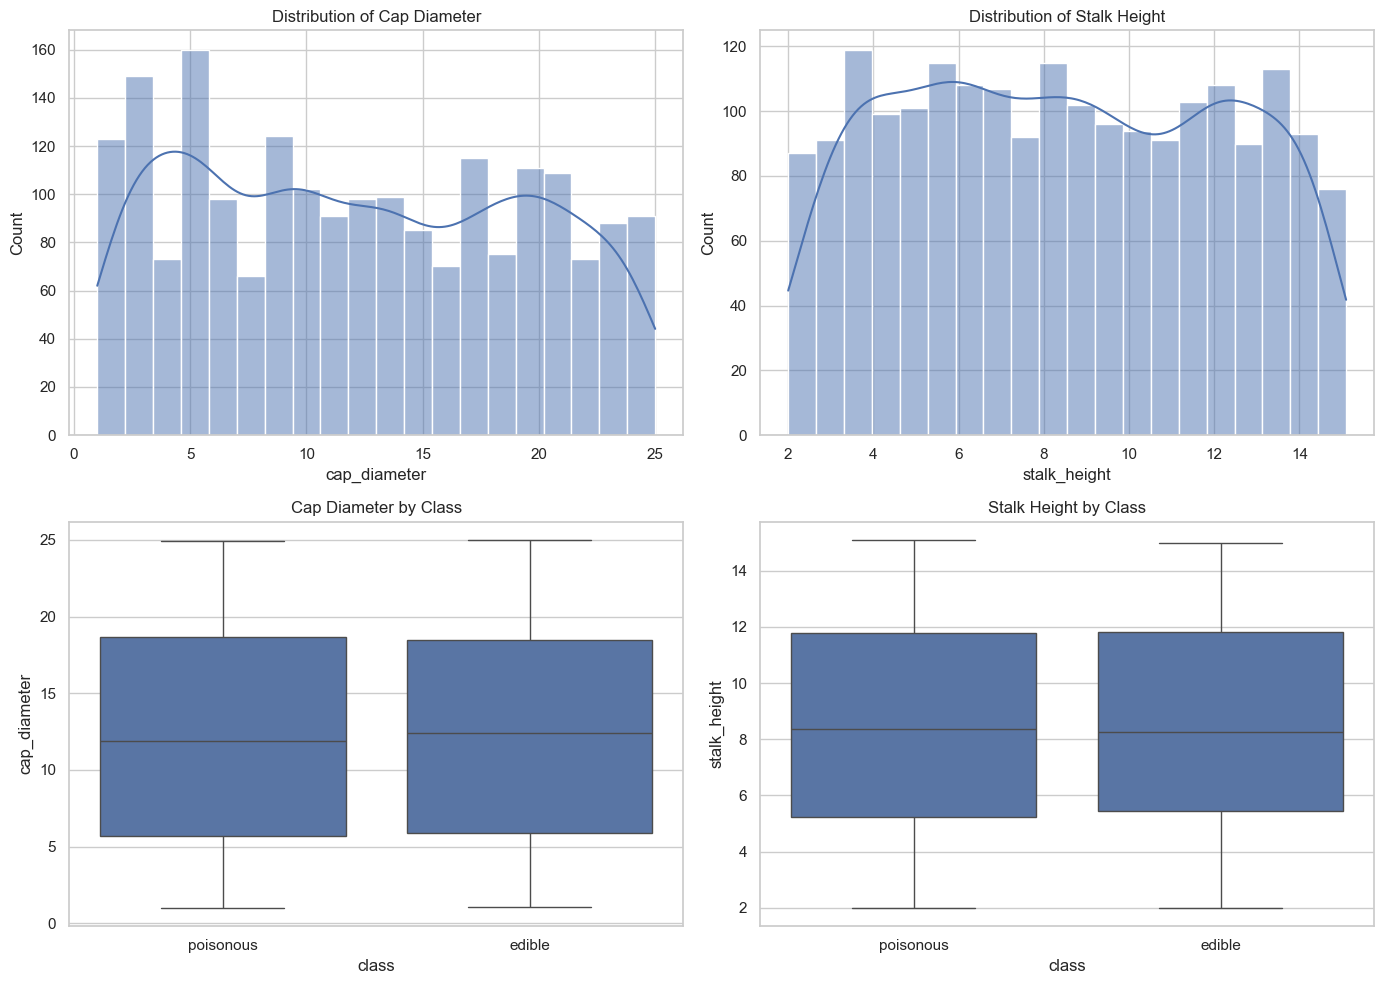

In [38]:

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot histograms for some key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for 'cap_diameter'
sns.histplot(mushroom_df['cap_diameter'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Cap Diameter')

# Histogram for 'stalk_height'
sns.histplot(mushroom_df['stalk_height'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Stalk Height')

# Box plot for 'cap_diameter'
sns.boxplot(x='class', y='cap_diameter', data=mushroom_df, ax=axes[1, 0])
axes[1, 0].set_title('Cap Diameter by Class')

# Box plot for 'stalk_height'
sns.boxplot(x='class', y='stalk_height', data=mushroom_df, ax=axes[1, 1])
axes[1, 1].set_title('Stalk Height by Class')

plt.tight_layout()
plt.show()


### Insights

1. **Cap Diameter Distribution (Top Left Plot)**:
   - The distribution of cap diameter appears to be multimodal, with peaks around 4-5 cm and 18-19 cm.
   - There are relatively few mushrooms with very small or very large cap diameters.

2. **Stalk Height Distribution (Top Right Plot)**:
   - The distribution of stalk height is more uniform, with a slight peak between 6 and 10 cm.
   - There is some tailing at the lower and upper extremes, indicating fewer mushrooms with extremely short or tall stalks.

3. **Cap Diameter by Class (Bottom Left Boxplot)**:
   - Both poisonous and edible mushrooms have similar ranges for cap diameters, with interquartile ranges between roughly 8 and 18 cm.
   - The medians are almost identical, suggesting that cap diameter does not strongly differentiate poisonous from edible mushrooms.

4. **Stalk Height by Class (Bottom Right Boxplot)**:
   - Similar to cap diameter, the stalk height for both classes follows a comparable range (2 to 14 cm).
   - Both have similar medians and distributions, implying that stalk height also does not offer significant differentiation between poisonous and edible mushrooms.

- Both the cap diameter and stalk height do not show significant differences between poisonous and edible mushrooms, as indicated by the overlapping ranges and similar medians. These features alone may not be sufficient to predict mushroom edibility without considering other characteristics.

### Investigate Feature Correlations

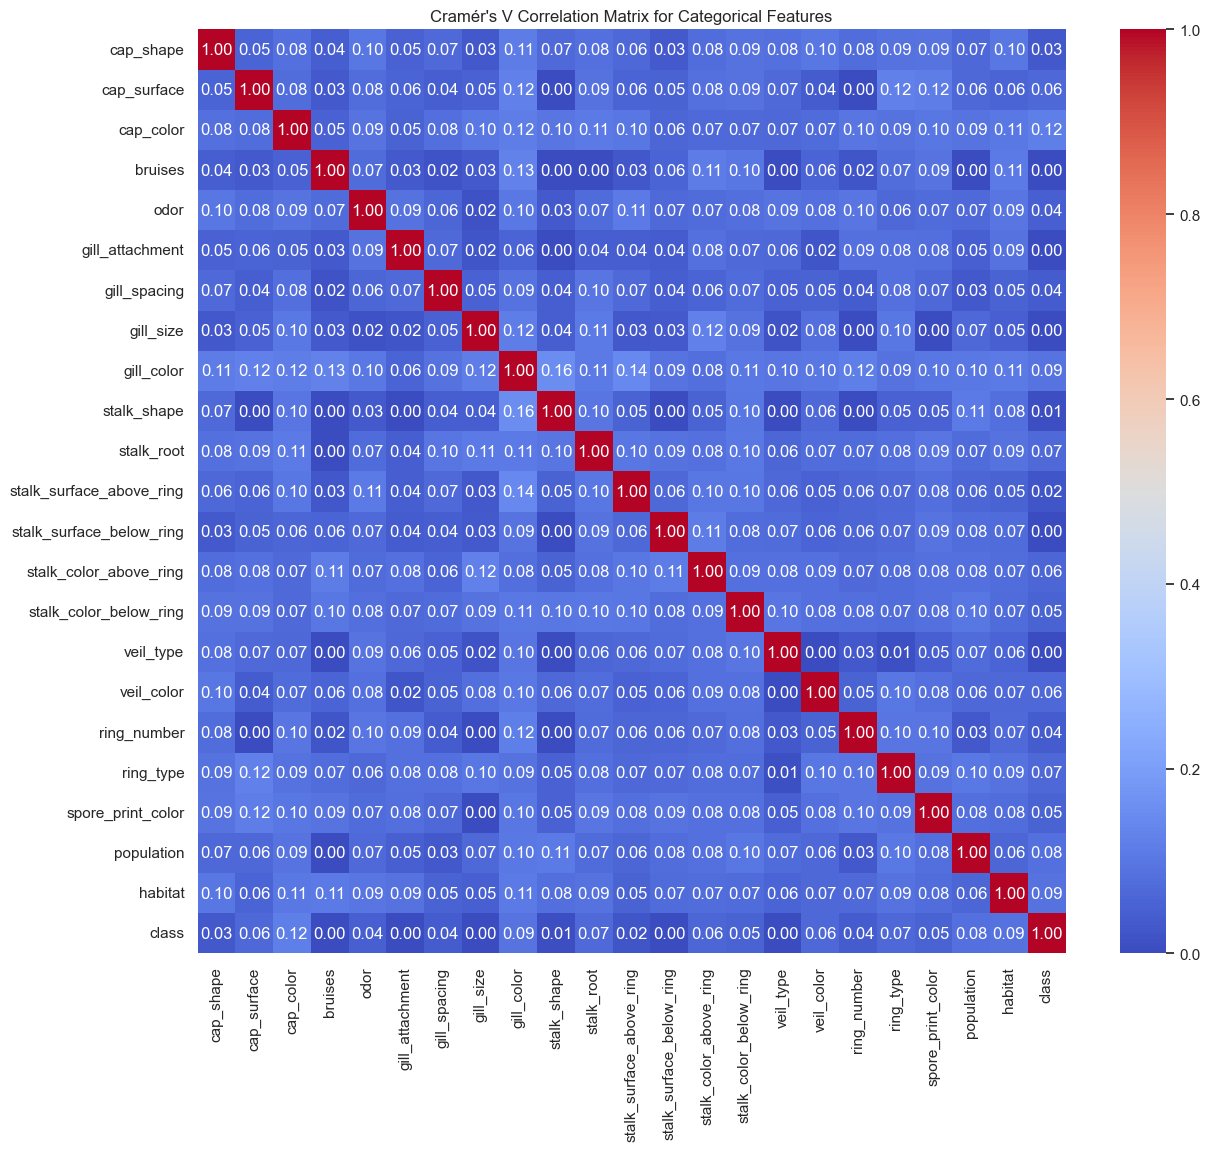

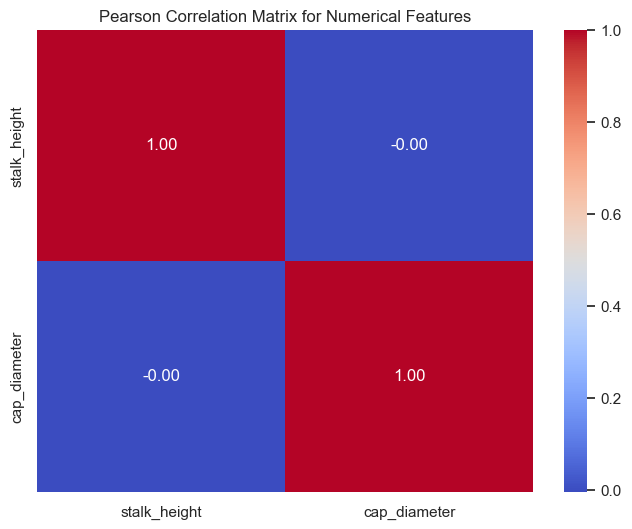

In [39]:
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for categorical features
categorical_features = mushroom_df.select_dtypes(include=['object']).columns
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        cramers_v_matrix.loc[col1, col2] = cramers_v(mushroom_df[col1], mushroom_df[col2])

# Convert to float for heatmap
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot heatmap for Cramér's V
plt.figure(figsize=(14, 12))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()

# Calculate Pearson correlation for numerical features
numerical_features = mushroom_df.select_dtypes(include=['float64', 'int64']).columns
pearson_corr_matrix = mushroom_df[numerical_features].corr()

# Plot heatmap for Pearson correlation
plt.figure(figsize=(8, 6))
sns.heatmap(pearson_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix for Numerical Features')
plt.show()


### Insights

#### Insights from Cramér's V Correlation Matrix (for categorical features):
- **High correlation:** The diagonal shows perfect correlation for each feature with itself (as expected, a value of 1.00).
- **Low correlations:** Most features have low Cramér's V values (closer to 0), meaning there's little to no association between these categorical features. This suggests that the features are relatively independent of each other.
- **Odor:** The "odor" feature seems to have low correlations with other features, indicating it might have distinct categorical values that are not strongly related to others.
- **Stalk-related features:** Some slight correlations can be observed between "stalk_color_above_ring" and "stalk_color_below_ring," likely because these features describe similar attributes.

#### Insights from Pearson Correlation Matrix (for numerical features):
- **No significant linear relationship:** The Pearson correlation coefficients between "stalk_height" and "cap_diameter" are close to zero (-0.00). This means there is no linear relationship between these two features.
- **Self-correlation:** The diagonal elements are 1.00, representing perfect self-correlation for "stalk_height" and "cap_diameter," as expected.

#### Overall Insights:
- The features, both categorical and numerical, show low correlation with each other, which might indicate that these variables are fairly independent and might contribute uniquely to the model's predictive power.
- Based on this, you might explore interaction terms or nonlinear models if you're working on a predictive task, as linear relationships are minimal between these variables.

## Step 2: Data Preprocessing

### Encode Categorical Variables

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoders = {}
for column in mushroom_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    mushroom_df[column] = le.fit_transform(mushroom_df[column])
    label_encoders[column] = le

### Split the Dataset

In [41]:
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = mushroom_df.drop('class', axis=1)
y = mushroom_df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 24), (400, 24), (1600,), (400,))

### Insights

The dataset has been successfully split into training and testing sets with 1600 samples for training and 400 samples for testing. Categorical variables have been encoded into numerical values.

## Step 3: Data Visualization

### Visualize Feature Distributions and Relationships

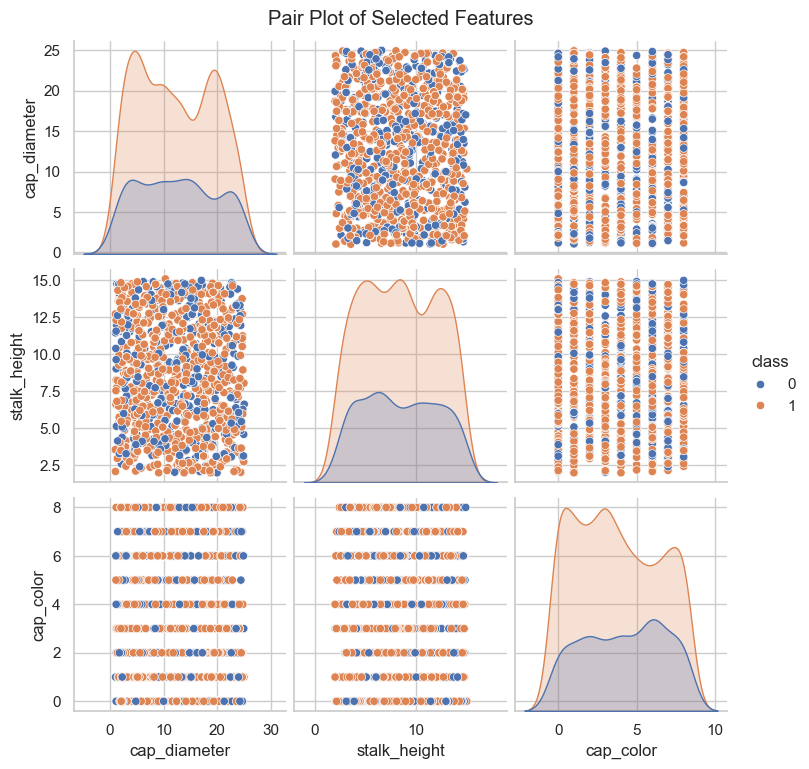

In [42]:
# Pair plot for a subset of features to visualize relationships
subset_features = ['cap_diameter', 'stalk_height', 'cap_color', 'class']
sns.pairplot(mushroom_df[subset_features], hue='class', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

### Insights

**Correlations**:

   - There is a slight correlation between `cap_diameter` and `stalk_height` as seen from the scatter plot in the top-right corner, but the overlap between the two classes means this might not strongly distinguish the two.
   - No clear correlation is observed between `cap_color` and the other features.

**Key Insight:**

The features `cap_diameter` and `stalk_height` seem to have more informative distributions between the two classes, especially for class 1. `cap_color` appears more evenly distributed across both classes, suggesting it may not be as useful for separating them.

### Plotting the Distribution of classes to check imbalance

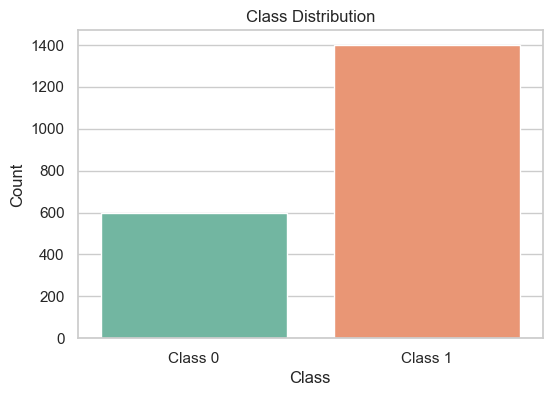

In [43]:
# Plotting the distribution of classes
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=mushroom_df, palette='Set2')

# Adding labels and title
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.show()

- This Distribution clearly shows that there is a significant imbalance between `class 0` and `class 1`.
- So we have to give `class_weight = 'balanced'` in svm model training

## Step 4: SVM Implementation

### Implement and Train the SVM Classifier

In [44]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Implement the SVM classifier
svm_classifier = SVC(kernel='linear',class_weight= 'balanced')

# Train the SVM model on the training data
svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy =',accuracy)
print('Precision =',precision)
print('Recall =',recall)
print('F1 Score =',f1)

print('\n')
print('Classification Report:-')
print(classification_rep)

Accuracy = 0.54
Precision = 0.5830119421747328
Recall = 0.54
F1 Score = 0.552796784884783


Classification Report:-
              precision    recall  f1-score   support

           0       0.36      0.50      0.42       133
           1       0.69      0.56      0.62       267

    accuracy                           0.54       400
   macro avg       0.53      0.53      0.52       400
weighted avg       0.58      0.54      0.55       400



**Key Observations:**

- The model is performing better for class 1 (majority class), with a higher precision and recall, but still has a decent amount of false negatives.
- The model struggles significantly with class 0 (minority class), having low precision and recall, which could be due to class imbalance.
- The overall performance (as seen from the F1 score) indicates that the model needs improvement, especially in correctly identifying minority class instances.

## Step 5: Visualization of SVM Results

### Visualize Classification Results

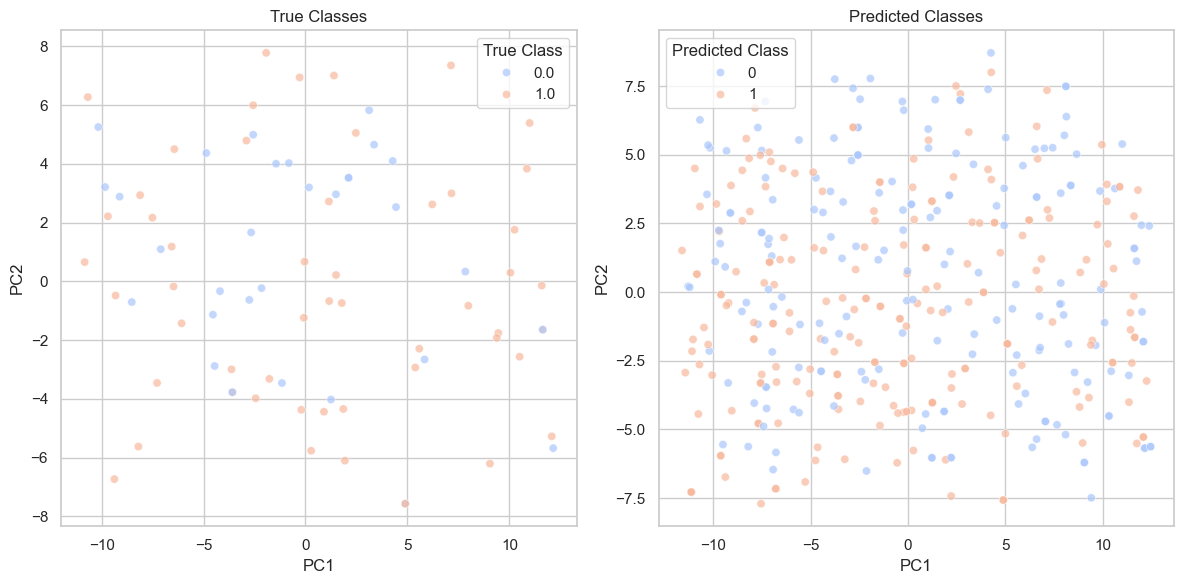

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Create a DataFrame for visualization
df_vis = pd.DataFrame(X_test_pca, columns=['PC1', 'PC2'])
df_vis['True Class'] = y_test
df_vis['Predicted Class'] = y_pred

# Plot the true classes
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='True Class', palette='coolwarm', alpha=0.7)
plt.title('True Classes')

# Plot the predicted classes
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_vis, x='PC1', y='PC2', hue='Predicted Class', palette='coolwarm', alpha=0.7)
plt.title('Predicted Classes')

plt.tight_layout()
plt.show()

### Insights

The scatter plots show the true classes and predicted classes in a 2D space reduced by PCA. The visualization indicates that the SVM model has difficulty distinguishing between the two classes, especially for class 0.

## Step 6: Parameter Tuning and Optimization

### Perform Grid Search for Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
        'kernel': ['rbf', 'sigmoid'],
        'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
        'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0.1, 0.001, 0.0001]
    }

# Initialize the Grid Search with cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, np.float64(0.8512500000000001))

#### Hyperparameters:
- **C = 15**: The regularization parameter. A higher value of `C` means the model will attempt to classify all training examples correctly, potentially at the cost of generalization (overfitting).
- **gamma = 0.5**: The kernel coefficient for the RBF kernel. A higher value of `gamma` means the model will try to fit the training data more precisely, leading to a more complex decision boundary.
- **kernel = 'rbf'**: The Radial Basis Function (RBF) kernel is being used. This kernel is popular for its flexibility in handling non-linear data by mapping the data into higher-dimensional space.

#### Best Score:
- **Score = 0.85125 (85.1%)**: This likely represents the cross-validated accuracy score achieved by the model with the chosen hyperparameters. It indicates how well the model is performing after tuning.

#### Key Insights:
1. **Improvement through Tuning**: Achieving 85.1% accuracy suggests a significant improvement in model performance, especially if the accuracy was much lower before tuning.
   
2. **Regularization and Gamma**: The higher values of `C` and `gamma` indicate that the model is fitting the data more aggressively. However, it's important to monitor overfitting with such settings—cross-validation likely helped mitigate this risk.

#### Next Steps:
- **Test the model on a hold-out test set** to ensure that the tuned hyperparameters generalize well and are not overfitting the training data.
- **Evaluate additional metrics** like precision, recall, and F1-score, especially if the data is imbalanced.

### Fitting, Testing and Analysing SVM model using best Hyperparameter

In [47]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Implement the SVM classifier
tuned_svm_classifier = SVC(kernel='rbf',C=15, gamma=0.5)

# Train the SVM model on the training data
tuned_svm_classifier.fit(X_train, y_train)

# Predict on the testing data
y_pred = tuned_svm_classifier.predict(X_test)

# Evaluate model performance
tunned_accuracy = accuracy_score(y_test, y_pred)
tunned_precision = precision_score(y_test, y_pred, average='weighted')
tunned_recall = recall_score(y_test, y_pred, average='weighted')
tunned_f1 = f1_score(y_test, y_pred, average='weighted')
tunned_classification_rep = classification_report(y_test, y_pred)

print('Accuracy =',tunned_accuracy)
print('Precision =',tunned_precision)
print('Recall =',tunned_recall)
print('F1 Score =',tunned_f1)

print('\n')
print('Classification Report:-')
print(tunned_classification_rep)

Accuracy = 0.885
Precision = 0.9019009584664537
Recall = 0.885
F1 Score = 0.8775376175548589


Classification Report:-
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       133
           1       0.85      1.00      0.92       267

    accuracy                           0.89       400
   macro avg       0.93      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400



#### **Analysis of the SVM Performance After Hyperparameter Tuning**

With the latest results, it’s clear that the SVM model has shown **improved performance**. Below is a detailed analysis of the metrics:

#### **Class-Wise Performance**:
- **Class 0 (Minority Class)**:
  - **Precision**: 1.00 (indicating no false positives for this class, but this could also be due to imbalance)
  - **Recall**: 0.65 (suggesting 65% of class 0 instances were correctly classified)
  - **F1-Score**: 0.79 (a weighted balance of precision and recall)

- **Class 1 (Majority Class)**:
  - **Precision**: 0.85 (indicating that 85% of the predicted instances were correct)
  - **Recall**: 1.00 (suggesting the model identified all class 1 instances correctly)
  - **F1-Score**: 0.92 (indicating a high balance between precision and recall)

#### **Key Insights**:
1. **Accuracy (88.5%)**: This suggests strong overall performance, showing that the model is correctly classifying a high proportion of instances.
   
2. **Precision (90.19%)**: This high precision indicates that most of the positive predictions are correct. However, precision can sometimes be misleading in cases of class imbalance, which is why the recall and F1 score are also essential to evaluate.

3. **Recall (88.5%)**: Recall is slightly lower, suggesting that the model is slightly more conservative in finding all instances of the positive class (class 1). However, since this value is still high, it indicates that the model is not significantly missing true positives.

4. **F1 Score (87.75%)**: The F1 score is relatively high and balanced between precision and recall, indicating good model performance across both metrics.

#### **Class Imbalance Impact**:
- The **recall for class 0 (0.65)** is notably lower than for class 1 (1.00), indicating that the model is less successful in identifying all instances of the minority class (class 0).
- **Precision for class 0 (1.00)** is perfect, but this could also suggest the model is playing it safe by classifying only a small proportion of class 0 instances (hence the lower recall).
- **Class 1 is well-represented** in the data, with a recall of 1.00 and a strong F1 score of 0.92, confirming that the model is biased toward identifying class 1 accurately.

#### **Practical Implications**:
- **Model Bias Toward Class 1**: The model seems to be slightly biased towards class 1, which could be due to class imbalance. This bias is reflected in the recall disparity between the two classes.
- **Handling Class Imbalance**: Given the perfect precision for class 0 but lower recall, techniques such as **oversampling the minority class** (class 0) or **undersampling the majority class** (class 1) could be considered to improve the model's ability to detect minority class instances without sacrificing overall accuracy.

## Step 7: Comparison and Analysis

### Compare SVM performance with various kernels

In [54]:
score_dict = {'Model':['SVM Model (linear)','SVM Model (Rbf)'],
              'Accuracy':[accuracy,tunned_accuracy],
              'Precision':[precision,tunned_precision],
              'Recall': [recall,tunned_recall],
              'F1 Score': [f1,tunned_f1]}

score_df = pd.DataFrame(score_dict)
score_df

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM Model (linear),0.540,0.583012,0.540,0.552797
1,SVM Model (Rbf),0.885,0.901901,0.885,0.877538


**Interpretation:**

- **SVM Model (linear):** 
  - Accuracy and recall are both 54%, indicating that the model correctly classifies 54% of the samples.
  - Precision is slightly higher at ~58%, meaning when the model predicts a positive class, it's correct about 58% of the time.
  - F1 Score (~55%) suggests a balanced performance between precision and recall.

- **SVM Model (Rbf):**
  - With a significantly higher accuracy of 88.5%, this model is much better at correctly classifying samples.
  - Precision is also high at ~90.2%, so it's very confident in its positive predictions.
  - Recall (88.5%) shows that it's equally good at finding true positives.
  - The F1 Score (~87.8%) indicates an overall robust performance with a good balance between precision and recall.

Overall, the SVM model with the Rbf kernel performs much better than the linear one in terms of all metrics.

### SVM Strengths and Weaknesses for the Mushroom Dataset

#### **Strengths**:
- **Handling Non-Linear Data**: As observed with the RBF kernel, SVM is highly effective in separating the classes based on complex, non-linear relationships. The mushroom dataset has a mix of categorical and continuous features that might interact in non-linear ways, and SVM (especially with the RBF kernel) can model these interactions well.
- **Robust to Overfitting (with Proper Tuning)**: When hyperparameters are appropriately tuned (e.g., `C` and `gamma` for RBF), SVM can balance the trade-off between bias and variance, making it robust to overfitting, especially in high-dimensional spaces.
- **Effective in High-Dimensional Spaces**: SVM is particularly suited for datasets with many features. Even though the mushroom dataset does not have a very high feature count, SVM can handle high-dimensional data well, making it scalable to larger, more complex datasets.

#### **Weaknesses**:
- **Sensitive to Imbalance**: As observed from the classification report, SVM’s performance on the minority class (`class 0`) was quite poor. This is a known limitation of SVMs, which tend to focus on the majority class. Handling this requires resampling techniques or class-weight adjustments.
- **Computational Complexity**: SVM, especially with non-linear kernels like RBF, can be computationally intensive for larger datasets. While this might not be an issue with the Mushroom dataset (since it's relatively small), scalability becomes a concern for bigger datasets.
- **Parameter Tuning Sensitivity**: The performance of SVM is highly dependent on choosing the correct hyperparameters (`C`, `gamma`). Poorly tuned hyperparameters can lead to suboptimal performance, and extensive cross-validation is required to achieve good results.

#### **Insights from EDA and Visualization**:
- **Class Overlap**: Based on the pair plot of selected features, it’s evident that some features exhibit significant overlap between classes (e.g., `cap_diameter`, `stalk_height`). This makes the classification task more challenging, especially for a linear kernel. The RBF kernel helps by projecting this data into higher dimensions to achieve better separation.
- **Feature Distribution**: The varying distributions of features (some categorical, some continuous) make SVM an appropriate choice, as it handles both types well. However, additional feature engineering (e.g., encoding categorical variables more effectively) could further improve the performance.

### Practical Implications of SVM in Real-World Classification Tasks

#### **A. Real-World Use Cases for SVM**:
- **Text Classification**: SVM is widely used for tasks like spam detection, sentiment analysis, and categorizing documents. Its ability to handle high-dimensional feature spaces (e.g., word counts, TF-IDF vectors) makes it highly effective for text classification.
- **Image Classification**: SVM with RBF kernels can be applied in object recognition and face detection tasks where data is often not linearly separable.
- **Bioinformatics**: SVM is used for classifying biological data, such as cancer diagnosis (based on gene expression data), where the data is high-dimensional and non-linear.

#### **B. Strengths in Real-World Applications**:
- **Generalization to New Data**: SVM tends to have strong generalization performance, especially in cases where the decision boundary is not complex (when a good kernel is chosen).
- **Effective in Small Datasets**: SVM shines when there is a small to medium-sized dataset with many features. It works well even with limited training data, unlike deep learning models, which require a lot of data to perform well.
- **Handles High-Dimensional Data Well**: In domains like genetics, text mining, or image recognition, SVM can manage datasets with a large number of features relative to the number of observations.

#### **C. Weaknesses in Real-World Applications**:
- **Scalability**: SVMs struggle with large datasets (millions of samples), where training time can be excessively long. For large-scale tasks, techniques like stochastic gradient descent (SGD) or neural networks are often preferred.
- **Interpretability**: Unlike decision trees or linear models, SVMs (especially with non-linear kernels) are harder to interpret. For certain real-world tasks, stakeholders may require interpretable models.
- **Sensitive to Feature Scaling**: SVMs are highly sensitive to feature scaling, which means that without proper preprocessing (e.g., standardizing or normalizing data), the performance can drop significantly.

---

### **Conclusion**:
- **Kernel Comparison**: For the Mushroom dataset, the **RBF kernel** outperforms other kernels due to the non-linear nature of the data. Tuning hyperparameters, especially `C` and `gamma`, is crucial for optimizing performance.
- **SVM Strengths and Weaknesses**: SVMs are powerful tools for handling non-linear data and high-dimensional feature spaces, but they require careful tuning and struggle with class imbalance. The complexity and computational expense of non-linear kernels are limitations for large datasets.
- **Practical Implications**: SVMs are widely used in text classification, bioinformatics, and image recognition. However, for large-scale tasks, other models may be more suitable due to SVM's scalability issues.

---
---
####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.